## MSE, R2 & Adjusted R2

#### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Load Dataset

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
# dropping unwanted column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


-----------------------

**ques 1. Create three well labelled scatterplots of this data with TV, Radio and News paper on the x-axis and Sales on the y-axis, and describe the relationship you see. The scatterplot colour should be red, blue and green respectively. Add suitable labels and title to the plot.**

[]

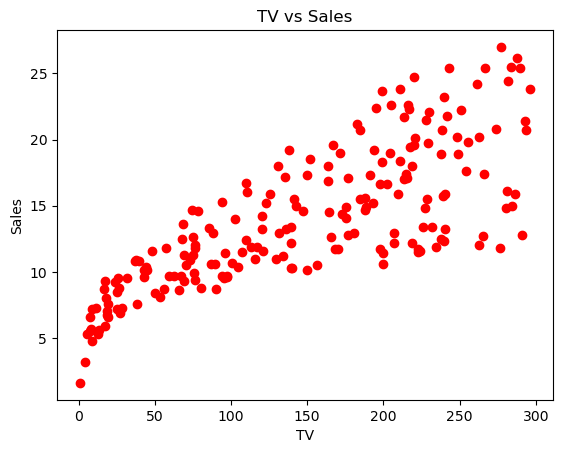

In [10]:
# scatterplot for TV vs Sales
plt.scatter(df['TV'], df['Sales'], color = 'red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.plot()

[]

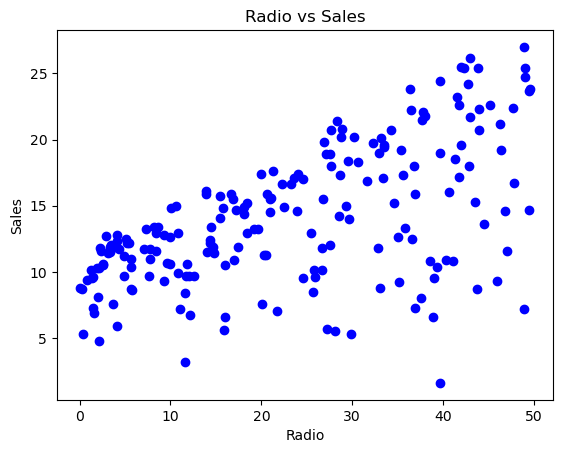

In [11]:
# scatterplot for Radio vs Sales
plt.scatter(df['Radio'], df['Sales'], color = 'blue')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.plot()

[]

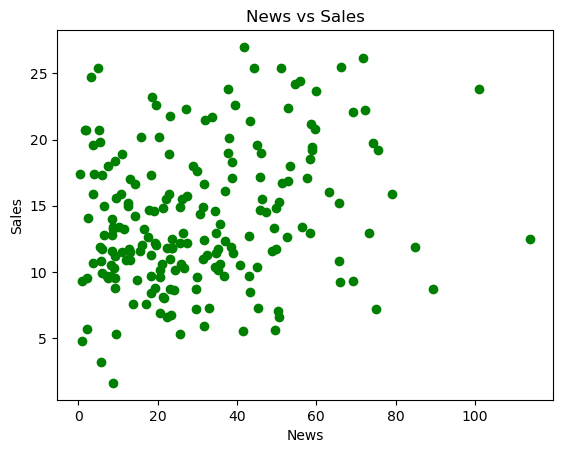

In [12]:
# scatterplot for Newspaper vs Sales
plt.scatter(df['Newspaper'], df['Sales'], color = 'green')
plt.xlabel('News')
plt.ylabel('Sales')
plt.title('News vs Sales')
plt.plot()

--------------------

**ques 2. In the scatterplot you made, what is the explanatory variable? What is the response variable? Why might you want to construct the problem in this way?**

ans. For the first, second and third plots, the explanatory variables are TV, Radio and News advertising data respectively and the response variable is Sales for all the three plots. We might want to construct the problem in this way to visualize what indepenedent variables or factors are correlated with the depenedent variabeles, which in this case, is Sales. Visualizing is an easy and foolproof way to get quick information about the data.

-------------------------

**ques 3. Compute Pearson’s correlation coefficient between sales and each of the independent variables. What is your observation?**

In [18]:
n = len(df)

# sales vs TV
df1 = df[['Sales', 'TV']]
corr_df1 = df1.corr()
c1 = corr_df1.iloc[0, 1]

# sales vs radio
df2 = df[['Sales', 'Radio']]
corr_df2 = df2.corr()
c2 = corr_df2.iloc[0, 1]

# sales vs news
df3 = df[['Sales', 'Newspaper']]
corr_df3 = df3.corr()
c3 = corr_df3.iloc[0, 1]

print("Pearson’s correlation coefficient for Sales and TV - {:.2f}".format(c1))
print("Pearson’s correlation coefficient for Sales and Radio - {:.2f}".format(c2))
print("Pearson’s correlation coefficient for Sales and Newspaper - {:.2f}".format(c3))

Pearson’s correlation coefficient for Sales and TV - 0.78
Pearson’s correlation coefficient for Sales and Radio - 0.58
Pearson’s correlation coefficient for Sales and Newspaper - 0.23


ans. We can infer from the correlation coefficient values that all three correlations are positive. Sales vs TV can be said to be strongly positively correlated, Sales vs Radio can be said to be not strongly positively correlated and finally, Sales vs Newspaper can be said to be weakly positively correlated.

---------------------

**ques 4. Split the data into train (80%) and test (20%) (without shuffling). Fit a simple linear regression model on the train data for the three independent variables separately and assess the accuracy of the model in terms of MSE (train and test). Which independent variable contributes to accurate prediction of Sales?**

In [27]:
X_tv = df[['TV']]
X_radio = df[['Radio']]
X_news = df[['Newspaper']]

y = df['Sales']

In [24]:
# independend variable - TV
X_train, X_test, y_train, y_test = train_test_split(
                                   X_tv, y, test_size = 0.2, 
                                   shuffle = False)
# model fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

# getting mse
y_train_pred_tv = lr.predict(X_train)
y_test_pred_tv = lr.predict(X_test)
mse_train_tv = mean_squared_error(y_train, y_train_pred_tv)
mse_test_tv = mean_squared_error(y_test, y_test_pred_tv)


# independend variable - Radio
X_train, X_test, y_train, y_test = train_test_split(
                                   X_radio, y, test_size = 0.2, 
                                   shuffle = False)
# model fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

# getting mse
y_train_pred_radio = lr.predict(X_train)
y_test_pred_radio = lr.predict(X_test)
mse_train_radio = mean_squared_error(y_train, y_train_pred_radio)
mse_test_radio = mean_squared_error(y_test, y_test_pred_radio)


# independend variable - News
X_train, X_test, y_train, y_test = train_test_split(
                                   X_news, y, test_size = 0.2, 
                                   shuffle = False)
# model fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

# getting mse
y_train_pred_news = lr.predict(X_train)
y_test_pred_news = lr.predict(X_test)

mse_train_news = mean_squared_error(y_train, y_train_pred_news)
mse_test_news = mean_squared_error(y_test, y_test_pred_news)


print("MSE for Training (Sales vs TV) - {:.3f}".format(mse_train_tv))
print("MSE for Testing (Sales vs TV) - {:.3f}".format(mse_test_tv))
print()
print("MSE for Training (Sales vs Radio) - {:.3f}".format(mse_train_radio))
print("MSE for Testing (Sales vs Radio) - {:.3f}".format(mse_test_radio))
print()
print("MSE for Training (Sales vs News) - {:.3f}".format(mse_train_news))
print("MSE for Testing (Sales vs News) - {:.3f}".format(mse_test_news))

MSE for Training (Sales vs TV) - 9.700
MSE for Testing (Sales vs TV) - 14.129

MSE for Training (Sales vs Radio) - 19.063
MSE for Testing (Sales vs Radio) - 14.440

MSE for Training (Sales vs News) - 26.027
MSE for Testing (Sales vs News) - 24.355


ans. The model with the least MSE will be the one that provides accurate prediction of Sales. From the MSE scores, it is clear that the independent variable TV gives the least MSE value for both training and testing compared to the remaining two independent variables. Therefore we can conclude that the independent variable TV contributes to more accurate prediction of Sales.

_____________________

**ques 5. Fit multiple linear regression model on the train data for the different possible combinations of the three independent variables and assess the accuracy of the model in terms of MSE (train and test). Which combination contributes to accurate prediction of Sales?**

ans. Since we have 3 independent variables, we can have 4 different combinations. These will be:<br>
1. TV, Radio & Sales (2 independent variables)
2. Radio, News & Sales (2 independent variables)
3. News, TV & Sales (2 independent variables)
4. TV, Radio, News & Sales (3 independent variables)

In [31]:
X_tv_radio = df[['TV', 'Radio']]
X_radio_news = df[['Radio', 'Newspaper']]
X_news_tv = df[['Newspaper', 'TV']]
X = df[['TV', 'Radio', 'Newspaper']]

y = df['Sales']

In [33]:
# TV, Radio & Sales (2 independent variables)
X_train, X_test, y_train, y_test = train_test_split(
                                   X_tv_radio, y, test_size = 0.2, 
                                   shuffle = False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_tv_radio = lr.predict(X_train)
y_test_pred_tv_radio = lr.predict(X_test)
mse_train_tv_radio = mean_squared_error(y_train, y_train_pred_tv_radio)
mse_test_tv_radio = mean_squared_error(y_test, y_test_pred_tv_radio)


# Radio, News & Sales (2 independent variables)
X_train, X_test, y_train, y_test = train_test_split(
                                   X_radio_news, y, test_size = 0.2, 
                                   shuffle = False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_radio_news = lr.predict(X_train)
y_test_pred_radio_news = lr.predict(X_test)
mse_train_radio_news = mean_squared_error(y_train, y_train_pred_radio_news)
mse_test_radio_news = mean_squared_error(y_test, y_test_pred_radio_news)


# News, TV & Sales (2 independent variables)
X_train, X_test, y_train, y_test = train_test_split(
                                   X_news_tv, y, test_size = 0.2, 
                                   shuffle = False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_news_tv = lr.predict(X_train)
y_test_pred_news_tv = lr.predict(X_test)
mse_train_news_tv = mean_squared_error(y_train, y_train_pred_news_tv)
mse_test_news_tv = mean_squared_error(y_test, y_test_pred_news_tv)


# TV, Radio, News & Sales (3 independent variables)
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size = 0.2, 
                                   shuffle = False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
y_test_pred = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)


print("MSE for Training (TV, Radio & Sales) - {:.5f}".format(mse_train_tv_radio))
print("MSE for Testing (TV, Radio & Sales) - {:.5f}".format(mse_test_tv_radio))
print()
print("MSE for Training (Radio, News & Sales) - {:.5f}".format(mse_train_radio_news))
print("MSE for Testing (Radio, News & Sales) - {:.5f}".format(mse_test_radio_news))
print()
print("MSE for Training (News, TV & Sales) - {:.5f}".format(mse_train_news_tv))
print("MSE for Testing (News, TV & Sales) - {:.5f}".format(mse_test_news_tv))
print()
print("MSE for Training (TV, Radio, News & Sales) - {:.5f}".format(mse_train))
print("MSE for Testing (TV, Radio, News & Sales) - {:.5f}".format(mse_test))

MSE for Training (TV, Radio & Sales) - 2.82216
MSE for Testing (TV, Radio & Sales) - 2.79309

MSE for Training (Radio, News & Sales) - 19.06327
MSE for Testing (Radio, News & Sales) - 14.43136

MSE for Training (News, TV & Sales) - 8.77968
MSE for Testing (News, TV & Sales) - 13.10335

MSE for Training (TV, Radio, News & Sales) - 2.82179
MSE for Testing (TV, Radio, News & Sales) - 2.79115


We can conclude that the model built using the combination of all the independent variables leads to a better model. This is due to the fact that we have the least MSE for both training and testing.

___________________

**ques 6. What is the difference between R2 and Adjusted R2? Comment**

ans. R2, or the coefficient of determination, quantifies how well the independent variables explain the variance in the dependent variable. However, it tends to increase with the addition of predictors, even if they don't contribute meaningfully to the model. Adjusted R2 addresses this limitation by incorporating a penalty for adding predictors that don’t improve the model's explanatory power. It adjusts based on the number of predictors and sample size, providing a more accurate reflection of model performance. While R2 is useful for evaluating model fit, Adjusted R2 is better for comparing models with different numbers of predictors, ensuring parsimony and reliability.

__________________

**ques 7. Give your final comments on which model linear or multiple linear is apt for accurate prediction of sales based on MSE values for train and test and R2, Adjusted-R2 values.**

ans. So we will be calculating r2 and adjusted r2 values for all the four combinations and check which is the best model.

> **Variable Lookup Table** <br><br>
> r2_1, adjusted_r2_1 - independent variables: TV & Radio <br>
> r2_2, adjusted_r2_2 - independent variables: Radio & News <br>
> r2_3, adjusted_r2_2 - independent variables: News & TV <br>
> r2_all, adjusted_r2_all - independent variables: TV, Radio & News

In [46]:
# independent variables: TV & Radio
X_train, X_test, y_train, y_test = train_test_split(
                                   X_tv_radio, y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_1 = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 2 # number of independant variables
adjusted_r2_1 = 1 - (((1 - r2_1) * (n - 1)) / (n - p - 1))

print("R2 score the model TV & Radio vs Sales - {:.5f}".format(r2_1))
print("Adjusted R2 score the model TV & Radio vs Sales - {:.5f}".format(adjusted_r2_1))

R2 score the model TV & Radio vs Sales - 0.89552
Adjusted R2 score the model TV & Radio vs Sales - 0.88987


In [48]:
# independent variables: Radio & News
X_train, X_test, y_train, y_test = train_test_split(
                                   X_radio_news, y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_2 = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 2 # number of independant variables
adjusted_r2_2 = 1 - (((1 - r2_2) * (n - 1)) / (n - p - 1))

print("R2 score the model Radio & News vs Sales - {:.5f}".format(r2_2))
print("Adjusted R2 score the model Radio & News vs Sales - {:.5f}".format(adjusted_r2_2))

R2 score the model Radio & News vs Sales - 0.46015
Adjusted R2 score the model Radio & News vs Sales - 0.43097


In [50]:
# independent variables: News & TV
X_train, X_test, y_train, y_test = train_test_split(
                                   X_news_tv, y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_3 = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 2 # number of independant variables
adjusted_r2_3 = 1 - (((1 - r2_3) * (n - 1)) / (n - p - 1))

print("R2 score the model News & TV vs Sales - {:.5f}".format(r2_3))
print("Adjusted R2 score the model News & TV vs Sales - {:.5f}".format(adjusted_r2_3))

R2 score the model News & TV vs Sales - 0.50983
Adjusted R2 score the model News & TV vs Sales - 0.48333


In [52]:
# independent variables: TV, Radio & News
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_all = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 3 # number of independant variables
adjusted_r2_all = 1 - (((1 - r2_all) * (n - 1)) / (n - p - 1))

print("R2 score for the model TV, Radio & News vs Sales - {:.5f}".format(r2_all))
print("Adjusted R2 score for the model TV, Radio & News vs Sales - {:.5f}".format(adjusted_r2_all))

R2 score for the model TV, Radio & News vs Sales - 0.89559
Adjusted R2 score for the model TV, Radio & News vs Sales - 0.88689


Now we need to calculate r2 and adjusted r2 scores for the models TV vs Sales, Radio vs Sales and News vs Sales.

In [54]:
# independent variable: TV
X_train, X_test, y_train, y_test = train_test_split(
                                   X[['TV']], y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_tv_sales = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 1 # number of independant variables
adjusted_r2_tv_sales = 1 - (((1 - r2_tv_sales) * (n - 1)) / (n - p - 1))

print("R2 score for the model TV vs Sales - {:.5f}".format(r2_tv_sales))
print("Adjusted R2 score for the model TV vs Sales - {:.5f}".format(adjusted_r2_tv_sales))

R2 score for the model TV vs Sales - 0.47147
Adjusted R2 score for the model TV vs Sales - 0.45756


In [56]:
# independent variable: Radio
X_train, X_test, y_train, y_test = train_test_split(
                                   X[['Radio']], y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_radio_sales = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 1 # number of independant variables
adjusted_r2_radio_sales = 1 - (((1 - r2_radio_sales) * (n - 1)) / (n - p - 1))

print("R2 score for the model Radio vs Sales - {:.5f}".format(r2_radio_sales))
print("Adjusted R2 score for the model Radio vs Sales - {:.5f}".format(adjusted_r2_radio_sales))

R2 score for the model Radio vs Sales - 0.45981
Adjusted R2 score for the model Radio vs Sales - 0.44559


In [58]:
# independent variable: News
X_train, X_test, y_train, y_test = train_test_split(
                                   X[['Newspaper']], y, test_size = 0.2, 
                                   shuffle = False)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# calculating r2
y_arr = np.array(y)
ss_explained = sum((y_test_pred - y_test.mean()) ** 2)
ss_residual = sum((y_test - y_test_pred) ** 2)
ss_total = sum((y_test - y.mean()) ** 2)
r2_news_sales = 1 - (ss_residual / ss_total)

# calculating adjusted r2
n = len(y_test)
p = 1 # number of independant variables
adjusted_r2_news_sales = 1 - (((1 - r2_news_sales) * (n - 1)) / (n - p - 1))

print("R2 score for the model News vs Sales - {:.5f}".format(r2_news_sales))
print("Adjusted R2 score for the model News vs Sales - {:.5f}".format(adjusted_r2_news_sales))

R2 score for the model News vs Sales - 0.08893
Adjusted R2 score for the model News vs Sales - 0.06496


**Final Set of Values** <br>
These will be the MSE train scores, MSE test scores, r2 scores and adjusted r2 scores for the following models: <br>
1. TV vs Sales (Linear)
2. Radio vs Sales (Linear)
3. News vs Sales (Linear)
4. TV & Radio vs Sales (Multi-Linear)
5. Radio & News vs Sales (Multi-Linear)
6. News & TV vs Sales (Multi-Linear)
7. TV, Radio & News vs Sales (Multi-Linear)

In [60]:
# TV vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('TV vs SALES (Linear):')
print()
print("MSE for Training (Sales vs TV) - {:.3f}".format(mse_train_tv))
print("MSE for Testing (Sales vs TV) - {:.3f}".format(mse_test_tv))
print("R2 score for the model TV vs Sales - {:.3f}".format(r2_tv_sales))
print("Adjusted R2 score for the model TV vs Sales - {:.3f}".format(adjusted_r2_tv_sales))
print()
print('x----------------------------------------------------------------x')
print()

# Radio vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('RADIO vs SALES (Linear):')
print()
print("MSE for Training (Sales vs Radio) - {:.3f}".format(mse_train_radio))
print("MSE for Testing (Sales vs Radio) - {:.3f}".format(mse_test_radio))
print("R2 score for the model Radio vs Sales - {:.5f}".format(r2_radio_sales))
print("Adjusted R2 score for the model Radio vs Sales - {:.5f}".format(adjusted_r2_radio_sales))
print()
print('x----------------------------------------------------------------x')
print()

# News vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('NEWS vs SALES (Linear):')
print()
print("MSE for Training (Sales vs News) - {:.3f}".format(mse_train_news))
print("MSE for Testing (Sales vs News) - {:.3f}".format(mse_test_news))
print("R2 score for the model News vs Sales - {:.5f}".format(r2_news_sales))
print("Adjusted R2 score for the model News vs Sales - {:.5f}".format(adjusted_r2_news_sales))
print()
print('x----------------------------------------------------------------x')
print()

# TV & Radio vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('TV & RADIO vs SALES (Multi-Linear):')
print()
print("MSE for TV, Radio & Sales (Training) - {:.5f}".format(mse_train_tv_radio))
print("MSE for TV, Radio & Sales (Testing) - {:.5f}".format(mse_test_tv_radio))
print("R2 score the model TV & Radio vs Sales - {:.5f}".format(r2_1))
print("Adjusted R2 score the model TV & Radio vs Sales - {:.5f}".format(adjusted_r2_1))
print()
print('x----------------------------------------------------------------x')
print()

# Radio & News vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('RADIO & NEWS vs SALES (Multi-Linear):')
print()
print("MSE for Radio, News & Sales (Training) - {:.5f}".format(mse_train_radio_news))
print("MSE for Radio, News & Sales (Testing) - {:.5f}".format(mse_test_radio_news))
print("R2 score the model Radio & News vs Sales - {:.5f}".format(r2_2))
print("Adjusted R2 score the model Radio & News vs Sales - {:.5f}".format(adjusted_r2_2))
print()
print('x----------------------------------------------------------------x')
print()

# News & TV vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('NEWS & TV vs SALES (Multi-Linear):')
print()
print("MSE for News, TV & Sales (Training) - {:.5f}".format(mse_train_news_tv))
print("MSE for News, TV & Sales (Testing) - {:.5f}".format(mse_test_news_tv))
print("R2 score the model News & TV vs Sales - {:.5f}".format(r2_3))
print("Adjusted R2 score the model News & TV vs Sales - {:.5f}".format(adjusted_r2_3))
print()
print('x----------------------------------------------------------------x')
print()

# TV, Radio & News vs Sales - MSE train score, MSE test score, r2 score and adjusted r2 score
print('TV, RADIO & NEWS vs SALES (Multi-Linear):')
print()
print("MSE for TV, Radio, News & Sales (Training) - {:.5f}".format(mse_train))
print("MSE for TV, Radio, News & Sales (Testing) - {:.5f}".format(mse_test))
print("R2 score for the model TV, Radio & News vs Sales - {:.5f}".format(r2_all))
print("Adjusted R2 score for the model TV, Radio & News vs Sales - {:.5f}".format(adjusted_r2_all))

TV vs SALES (Linear):

MSE for Training (Sales vs TV) - 9.700
MSE for Testing (Sales vs TV) - 14.129
R2 score for the model TV vs Sales - 0.471
Adjusted R2 score for the model TV vs Sales - 0.458

x----------------------------------------------------------------x

RADIO vs SALES (Linear):

MSE for Training (Sales vs Radio) - 19.063
MSE for Testing (Sales vs Radio) - 14.440
R2 score for the model Radio vs Sales - 0.45981
Adjusted R2 score for the model Radio vs Sales - 0.44559

x----------------------------------------------------------------x

NEWS vs SALES (Linear):

MSE for Training (Sales vs News) - 26.027
MSE for Testing (Sales vs News) - 24.355
R2 score for the model News vs Sales - 0.08893
Adjusted R2 score for the model News vs Sales - 0.06496

x----------------------------------------------------------------x

TV & RADIO vs SALES (Multi-Linear):

MSE for TV, Radio & Sales (Training) - 2.82216
MSE for TV, Radio & Sales (Testing) - 2.79309
R2 score the model TV & Radio vs Sales -

From the outputs, we can infer that the mult-linear model with TV, Radio and Newspaper advertising is most accurate in terms of predicting Sales based on MSE values for train and test and R2, Adjusted-R2 values. A very close 2nd comes to the model with only TV and Radio advertising as the independent variables. In both the cases, its the multi-linear model that performs well.